Looking at political contribution to better understand distribution of giving

In [1]:
import sqlite3
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#connect to database
connection = sqlite3.connect("contributions.db")
cursor = connection.cursor()

#start will all individual donations to members of congress
cursor.execute("select amount from contrib_legislators")
results = cursor.fetchall()

In [5]:
#put results (first item of returned tuples) into a list
res_list = []
for res in results:
    res_list.append(res[0])
print len(res_list)

res_sorted = sorted(res_list)



3949590


In [7]:
# get mean, median, percentiles

a = np.array(res_list)

me = np.mean(a)
print "Mean: ", me

md = np.median(a)
print "Median: ", md

pct_25=np.percentile(a, 25)
pct_50=np.percentile(a, 50)
pct_75=np.percentile(a, 75)
pct_90=np.percentile(a, 90)
pct_95=np.percentile(a, 95)
pct_99=np.percentile(a, 99)

print "25th pct: %f\n50th pct: %f\n75th pct: %f\n90th: %f\n95th: %f\n99th: %f" % (pct_25, pct_50, pct_75, pct_90, pct_95, pct_99)

print "Min: %d" % (np.min(a))
print "Max: %d" % (np.max(a))

Mean:  1208.07391172
Median:  500.0
25th pct: 250.000000
50th pct: 500.000000
75th pct: 1000.000000
90th: 2400.000000
95th: 2500.000000
99th: 5000.000000
Min: -207732
Max: 5000000


Info on just individual contributions to Members of Congress

In [18]:
#get indiv. donations to legislators
cursor.execute("select contrib_legislators.amount from contrib_legislators JOIN contributors USING (contrib_id) where contributors.contrib_type = 'I'")
results = cursor.fetchall()

In [19]:
#put results (first item of returned tuples) into a list
indiv_list = []
for res in results:
    indiv_list.append(res[0])
print len(res_list)

indiv_sorted = sorted(indiv_list)

3949590


In [20]:
# get mean, median, percentiles

a = np.array(indiv_list)

me = np.mean(a)
print "Mean: ", me

md = np.median(a)
print "Median: ", md

pct_25=np.percentile(a, 25)
pct_50=np.percentile(a, 50)
pct_75=np.percentile(a, 75)
pct_90=np.percentile(a, 90)
pct_95=np.percentile(a, 95)
pct_99=np.percentile(a, 99)

print "25th pct: %f\n50th pct: %f\n75th pct: %f\n90th: %f\n95th: %f\n99th: %f" % (pct_25, pct_50, pct_75, pct_90, pct_95, pct_99)

print "Min: %d" % (np.min(a))
print "Max: %d" % (np.max(a))

Mean:  779.667195498
Median:  500.0
25th pct: 250.000000
50th pct: 500.000000
75th pct: 1000.000000
90th: 2000.000000
95th: 2400.000000
99th: 2600.000000
Min: -150000
Max: 2000000


In [28]:
#count how many 1 million +
great_mil = []

for item in indiv_list:
    if item >= 1000000:
        great_mil.append(item)
        
print len(great_mil)

10


In [25]:
#find how many donations $10 thousand +
great_tenthou = []

for item in indiv_list:
    if item >= 10000:
        great_tenthou.append(item)
        
print len(great_tenthou)

769


In [26]:
#count how many 5 thousand +
great_fivethou = []

for item in indiv_list:
    if item >= 5000:
        great_fivethou.append(item)
        
print len(great_fivethou)

7111


In [27]:
#count how many one thousand +
great_onethou = []

for item in indiv_list:
    if item >= 1000:
        great_onethou.append(item)
        
print len(great_onethou)

1127285


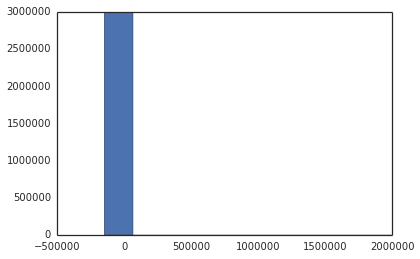

In [23]:
#plot histogram of individual contributions.  
sns.set_style("white")
sns.despine(left=True)

plt.hist(indiv_list, bins=10)
plt.show()